# Assignment 1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\shah4\IMP projects folder\SOC-2\IMDB Dataset.csv")

# Preview data
print(df.shape)
df.head()

c:\Users\shah4\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# for inspecting the data
df.info()
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


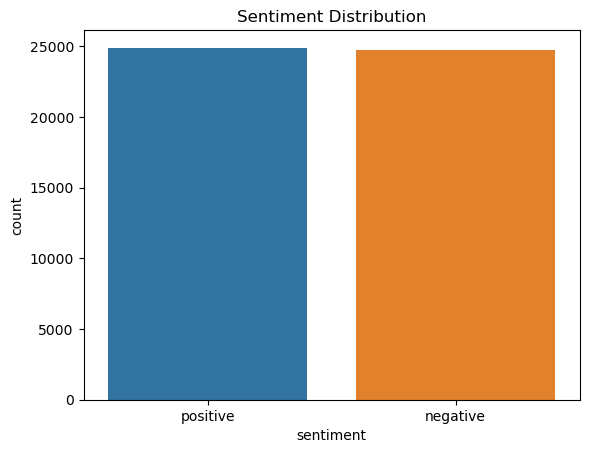

In [3]:
# here we know the class distribution to know if our classifier will be fair or biased.

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [4]:
# we need to clean the text
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


def clean_text(text):
    if '<' in text and '>' in text:
        text = BeautifulSoup(text, "html.parser").get_text()  # for Removing HTML
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


df['cleaned_review'] = df['review'].apply(clean_text)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


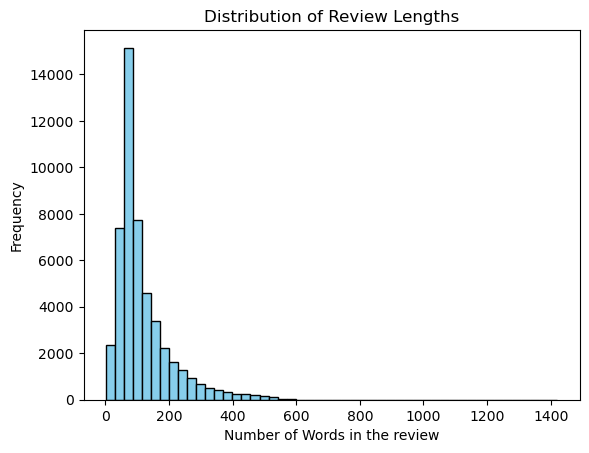

In [5]:
# We plot histograms of word counts in reviews here

df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in the review")
plt.ylabel("Frequency")
plt.show()

In [6]:
# Here we split data to train and test so we could train the model and during testing avoid overfitting

df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['label'], test_size=0.2, random_state=42)

In [7]:
# Here we try to look how accurate our model is

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# classification report has precision, recall and F1 score.
# Precision shows how many predicted positives were actually positive
# Recall is how many actual positives were correctly predicted
# F1-score is balance between precision and recall


Accuracy: 0.8859534133306444
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

